# Project Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X=pd.read_csv('/content/drive/MyDrive/Project Codes/Project P62 ** Do not Edit in these files directly **  ## Download and edit ##/Model Building/X_df.csv')
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_class=pd.read_csv('/content/drive/MyDrive/Project Codes/Project P62 ** Do not Edit in these files directly **  ## Download and edit ##/Model Building/Y_df_Class.csv')
Y_class.head()

,Unnamed: 0,Class
0,0,Abusive
1,1,Abusive
2,2,Abusive
3,3,Abusive
4,4,Abusive


In [ ]:
X_df=X.iloc[:,1:]

In [ ]:
Y_df=Y_class['Class']

**Spliting the data into train and test**

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X_df,Y_df, test_size=0.33,random_state=0)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((17584, 5000), (17584,), (8662, 5000), (8662,))

In [ ]:
x_train.to_csv('xtrain.csv')
!cp xtrain.csv "drive/My Drive/"

In [ ]:
y_train.to_csv('ytrain.csv')
!cp ytrain.csv "drive/My Drive/"

In [ ]:
ff=pd.DataFrame(y_train)
print('Train data -',ff.value_counts())
fft=pd.DataFrame(y_test)
print('Test data -',fft.value_counts())

Train data - Class      
Non Abusive    15311
Abusive         2273
dtype: int64
Test data - Class      
Non Abusive    7526
Abusive        1136
dtype: int64


**Balancing the splited data using SMOTE method**

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train1,y_train1=smt.fit_resample(x_train,y_train)
x_test1,y_test1=smt.fit_resample(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

## Logistic Regression

### Logistic Regression Using Default data

In [ ]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_pred_test = classifier.predict(x_test)
log_pred_train=classifier.predict(x_train)

In [ ]:
acc_log_train=accuracy_score(y_train,log_pred_train)*100
acc_log_test = accuracy_score(y_test, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train)
print("Accuracy of Test data =", acc_log_test)

Accuracy of Training data = 97.20200181983621
Accuracy of Test data = 96.36342646040175


In [ ]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

     Abusive       0.97      0.75      0.84      1136
 Non Abusive       0.96      1.00      0.98      7526

    accuracy                           0.96      8662
   macro avg       0.97      0.87      0.91      8662
weighted avg       0.96      0.96      0.96      8662



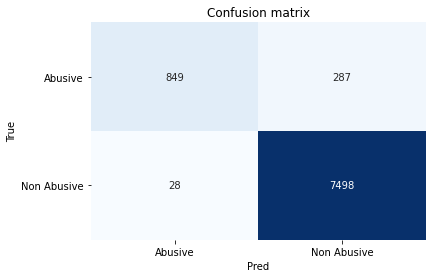

In [ ]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test,log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Logistic Regression using balanced data

In [ ]:
classifier2 = LogisticRegression(max_iter=2000)
classifier2.fit(x_train1 , y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_pred2_test = classifier.predict(x_test1)
log_pred2_train=classifier.predict(x_train1)

In [ ]:
acc2_log_train=accuracy_score(y_train1,log_pred2_train)*100
acc2_log_test = accuracy_score(y_test1, log_pred2_test) * 100
print('Accuracy of Training data =',acc2_log_train)
print("Accuracy of Test data =", acc2_log_test)

Accuracy of Training data = 81.63738488668277
Accuracy of Test data = 76.76056338028168


In [ ]:
print(classification_report(y_test1,log_pred2_test))

              precision    recall  f1-score   support

     Abusive       0.99      0.54      0.70      7526
 Non Abusive       0.68      1.00      0.81      7526

    accuracy                           0.77     15052
   macro avg       0.84      0.77      0.75     15052
weighted avg       0.84      0.77      0.75     15052



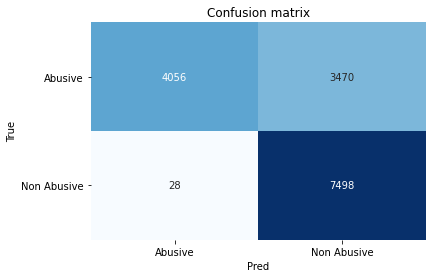

In [ ]:
classes = np.unique(y_test)
cm00 = metrics.confusion_matrix(y_test1,log_pred2_test)
fig, ax = plt.subplots()
sns.heatmap(cm00, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## SVM MODEL (Support Vector Machine)

### SVM with default data using TFIDF

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  cross_val_score

In [ ]:
# SVM model 

In [ ]:
model1=SVC()
model1.fit(x_train , y_train)
y_pred = model1.predict(x_test)

In [ ]:
y_prd_train=model1.predict(x_train)

In [ ]:
# Training and Test data Accuracy

In [ ]:
acc_svm_train=accuracy_score(y_train,y_prd_train)*100
acc_svm_test = accuracy_score(y_test, y_pred) * 100
print('Accuracy of Training data =',acc_svm_train)
print("Accuracy of Test data =", acc_svm_test)


Accuracy of Training data = 99.55641492265697
Accuracy of Test data = 98.08358346802125


In [ ]:
# Precision , Recall , f1-score of the model

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Abusive       0.98      0.88      0.92      1136
 Non Abusive       0.98      1.00      0.99      7526

    accuracy                           0.98      8662
   macro avg       0.98      0.94      0.96      8662
weighted avg       0.98      0.98      0.98      8662



In [ ]:
# Confusion matrix for the model

In [ ]:
# Abusive (1136) = 994 (87.5%) are correctly classified  and 142 (12.5%) are wrongly classified
# Non-Abusive(7526)= 7502 (99.6%) are correctly classified and 24 (0.4%) are wrongly classified

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


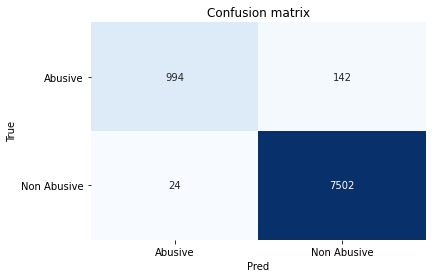

In [ ]:
classes = np.unique(y_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [ ]:
filename = 'nlp_model1.pkl'
pickle.dump(model1, open(filename, 'wb'))

### SVM with balanced data (by SMOTE method) using TFIDF

In [ ]:
model2=SVC()
model2.fit(x_train1 , y_train1)
y_pred2 = model2.predict(x_test1)

In [ ]:
y_prd_train1=model2.predict(x_train1)

In [ ]:
acc_svm_b_train=accuracy_score(y_train1,y_prd_train1)*100
acc_svm_b_test=accuracy_score(y_test1, y_pred2) * 100
print('Accuracy of Train data = ' ,acc_svm_b_train)
print('Accuracy of Test data =',acc_svm_b_test )

Accuracy of Train data =  99.7583436744824
Accuracy of Test data = 97.63486579856497


In [ ]:
# Precision , Recall , f1-score of the model

In [ ]:
print(classification_report(y_test1,y_pred2))

              precision    recall  f1-score   support

     Abusive       0.99      0.96      0.98      7526
 Non Abusive       0.96      0.99      0.98      7526

    accuracy                           0.98     15052
   macro avg       0.98      0.98      0.98     15052
weighted avg       0.98      0.98      0.98     15052



In [ ]:
import numpy as np
confusion_matrix(y_test1,y_pred2)


array([[7242,  284],
       [  72, 7454]])

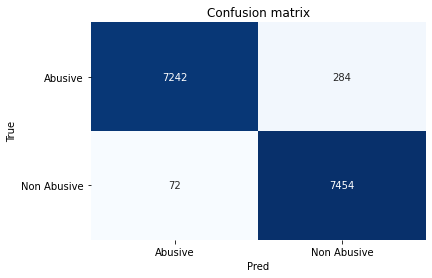

In [ ]:
cm2 = metrics.confusion_matrix(y_test1, y_pred2)
fig, ax = plt.subplots()
sns.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [ ]:
filename = 'nlp_model2.pkl'
pickle.dump(model2, open(filename, 'wb'))

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB

### Multinomial Navie Bayes model with default data

In [ ]:
NB_mb = MB()
NB_mb.fit(x_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Training accuracy

In [ ]:
train_pred_NB_mb = NB_mb.predict(x_train)
accuracy_train_NB_mb = accuracy_score(y_train,train_pred_NB_mb)*100
accuracy_train_NB_mb

94.92151956323931

In [ ]:
# Test accuracy

In [ ]:
test_pred_NB_mb = NB_mb.predict(x_test)
accuracy_test_NB_mb = accuracy_score(y_test,test_pred_NB_mb)*100
accuracy_test_NB_mb

94.13530362502887

In [ ]:
'''
The accuracies for train data(94.2%) and test data(94.1%) are good but there are many type 1 and type 2 errors as we can see in them
in confusion matrix.So that the precision ,recall,f1-score vales are less than the SVM model built above.
'''

In [ ]:
print(classification_report(y_test,test_pred_NB_mb))

              precision    recall  f1-score   support

     Abusive       0.86      0.67      0.75      1136
 Non Abusive       0.95      0.98      0.97      7526

    accuracy                           0.94      8662
   macro avg       0.90      0.82      0.86      8662
weighted avg       0.94      0.94      0.94      8662



In [ ]:
confusion_matrix_NB_mb = confusion_matrix(y_test,test_pred_NB_mb)
confusion_matrix_NB_mb

array([[ 756,  380],
       [ 128, 7398]])

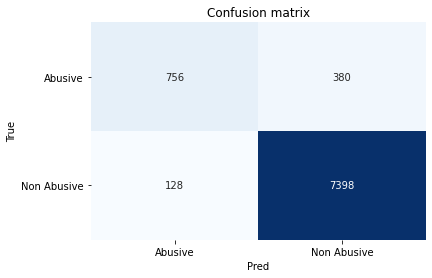

In [ ]:
cm3 = metrics.confusion_matrix(y_test,test_pred_NB_mb)
fig, ax = plt.subplots()
sns.heatmap(cm3, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Multinomial Navie Bayes model with balanced data(by SMOTE method)

In [ ]:
NB_mb_b = MB()
NB_mb_b.fit(x_train1,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
train_pred_NB_mb_b = NB_mb_b.predict(x_train1)
accuracy_train_NB_mb_b = accuracy_score(y_train1,train_pred_NB_mb_b)*100
test_pred_NB_mb_b = NB_mb.predict(x_test1)
accuracy_test_NB_mb_b = accuracy_score(y_test1,test_pred_NB_mb_b)*100
print('Accuracy of NB train data =',accuracy_train_NB_mb_b)
print('Accuracy of NB test data=',accuracy_test_NB_mb_b)

Accuracy of NB train data = 92.79276337273855
Accuracy of NB test data= 73.13313845336168


In [ ]:
'''
For this model with balanced data we can see precision,recall,f1-score values are bad than above models.Test accuracy is also not good. 
'''

In [ ]:
print(classification_report(y_test1,test_pred_NB_mb_b))

              precision    recall  f1-score   support

     Abusive       0.97      0.48      0.64      7526
 Non Abusive       0.65      0.98      0.79      7526

    accuracy                           0.73     15052
   macro avg       0.81      0.73      0.71     15052
weighted avg       0.81      0.73      0.71     15052



In [ ]:
confusion_matrix_NB_mb_b = confusion_matrix(y_test1,test_pred_NB_mb_b)
confusion_matrix_NB_mb_b

array([[3610, 3916],
       [ 128, 7398]])

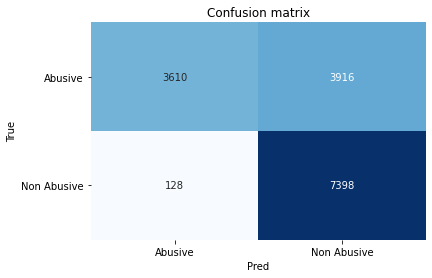

In [ ]:
cm4 = metrics.confusion_matrix(y_test1,test_pred_NB_mb_b)
fig, ax = plt.subplots()
sns.heatmap(cm4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Recurrent Neural Network (RNN) Model with Long Term-Short Memory Nerwork(LSTM)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project Codes/Project P62 ** Do not Edit in these files directly **  ## Download and edit ##/Feature Extraction/data_new.csv')
data.head()

,Unnamed: 0,cleaned_3,Class
0,0,eat shit john j pm john footbal bet minn buff ...,Abusive
1,1,fuck,Abusive
2,2,gentleman follow champagn avail approxim retai...,Abusive
3,3,sorri taken longjust tri fend chick life soooo...,Abusive
4,4,asshol john j john john seem make gambl proble...,Abusive


In [ ]:
y_df=pd.read_csv('/content/drive/MyDrive/Project Codes/Project P62 ** Do not Edit in these files directly **  ## Download and edit ##/Model Building/Y_df.csv')
y=y_df.iloc[:,1]

In [ ]:
data2=data.dropna(how='any')

In [ ]:
corpus = data2['cleaned_3'].tolist()


In [ ]:
# Vocabulary size
voc_size=10000

In [ ]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]

In [ ]:
#Embedding representation
sent_length = 200
embedding_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
#LSTM Model

embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length =sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Independent variables and Dependent Variables

In [ ]:
X_final=np.array(embedding_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((26246, 200), (26246,))

In [ ]:
# Splitting Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

In [ ]:
# Training Model

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=20, batch_size= 100)

Epoch 1/20
176/176 [==============================] - 78s 427ms/step - loss: 0.2456 - accuracy: 0.9126 - val_loss: 0.1211 - val_accuracy: 0.9597
Epoch 2/20
176/176 [==============================] - 75s 426ms/step - loss: 0.0711 - accuracy: 0.9791 - val_loss: 0.0807 - val_accuracy: 0.9769
Epoch 3/20
176/176 [==============================] - 75s 427ms/step - loss: 0.0355 - accuracy: 0.9906 - val_loss: 0.0799 - val_accuracy: 0.9777
Epoch 4/20
176/176 [==============================] - 75s 424ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 5/20
176/176 [==============================] - 75s 427ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0849 - val_accuracy: 0.9801
Epoch 6/20
176/176 [==============================] - 75s 427ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0956 - val_accuracy: 0.9795
Epoch 7/20
176/176 [==============================] - 74s 422ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.1018 - val_ac

In [ ]:
y_pred_Test=model.predict_classes(X_test)
y_pred_Train=model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
Accuracy_test = accuracy_score(Y_test,y_pred_Test)*100
Accuracy_train=accuracy_score(Y_train,y_pred_Train)*100
print("Accuacy for train",Accuracy_train)
print("Accuracy for test: ", Accuracy_test)


Accuacy for train 99.90900818926298
Accuracy for test:  97.55252828446086


In [ ]:
print(classification_report(Y_test,y_pred_Test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7526
           1       0.90      0.91      0.91      1136

    accuracy                           0.98      8662
   macro avg       0.94      0.95      0.95      8662
weighted avg       0.98      0.98      0.98      8662



In [ ]:
confusion_matrix(Y_test,y_pred_Test)

array([[7411,  115],
       [  97, 1039]])

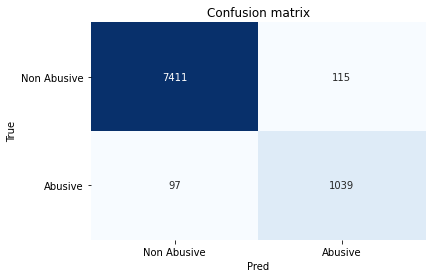

In [ ]:
classes2=['Non Abusive','Abusive']
cm5 = metrics.confusion_matrix(Y_test,y_pred_Test)
fig, ax = plt.subplots()
sns.heatmap(cm5, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes2, 
       yticklabels=classes2, title="Confusion matrix")
plt.yticks(rotation=0);

## Model's Summary

In [ ]:
AS={'Models':['Logistic Regression','Logistic Regression (Balance data)','SVM', 'SVM (Balance data)', 'Multinomial Naive Bayes', 'Multinomial Naive Bayes(Balance data)', 'RNN with LTSM Model'],
    'Train Accuracy':[acc_log_train,acc2_log_train,acc_svm_train,acc_svm_b_train,accuracy_train_NB_mb,accuracy_train_NB_mb_b,Accuracy_train]
    ,'Test Accuracy':[acc_log_test,acc2_log_test,acc_svm_test,acc_svm_b_test,accuracy_test_NB_mb,accuracy_test_NB_mb_b,Accuracy_test]}
 

In [ ]:
Model_Acc=pd.DataFrame(AS, index =[1,2,3,4,5,6,7])

In [ ]:
Model_Acc

,Models,Train Accuracy,Test Accuracy
1,Logistic Regression,97.202002,96.363426
2,Logistic Regression (Balance data),81.637385,76.760563
3,SVM,99.556415,98.083583
4,SVM (Balance data),99.758344,97.634866
5,Multinomial Naive Bayes,94.921520,94.135304
6,Multinomial Naive Bayes(Balance data),92.792763,73.133138
7,RNN with LTSM Model,99.909008,97.552528


**Of all the above models we got best results with SVM and RNN models**

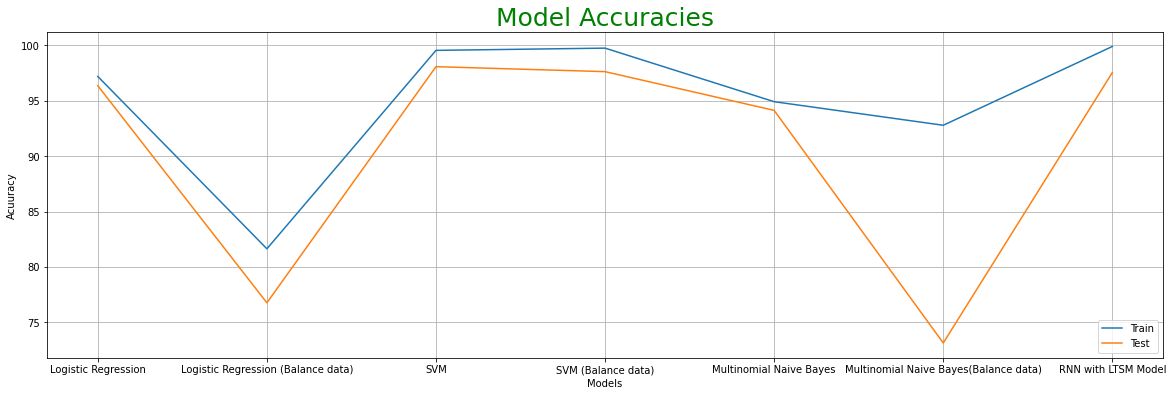

In [ ]:
plt.figure(figsize =(20, 6))
plt.plot(Model_Acc['Models'],Model_Acc['Train Accuracy'])
plt.plot(Model_Acc['Models'],Model_Acc['Test Accuracy'])
plt.title('Model Accuracies',fontdict={'fontsize': 25,'fontweight' : 15,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('Acuuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show();

## Testing with Sample Dataset

In [ ]:
smp_data=pd.read_csv('/content/drive/MyDrive/train_preprocessed.csv')
smp_data.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0,0,0,train,0,0,Non Abusive,0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0,0,0,train,0,0,Non Abusive,0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0,0,0,train,0,0,Non Abusive,0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0,0,0,train,0,0,Non Abusive,0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0,0,0,train,0,0,Non Abusive,0


In [ ]:
smp=smp_data[['comment_text','toxic']]
smp.head()

,comment_text,toxic
0,explanation why the edits made under my userna...,Non Abusive
1,d aww he matches this background colour i m s...,Non Abusive
2,hey man i m really not trying to edit war it...,Non Abusive
3,more i can t make any real suggestions on im...,Non Abusive
4,you sir are my hero any chance you remember...,Non Abusive


In [ ]:
smp_abu=smp.iloc[:4000,:]
smp_abu['toxic'].value_counts()

Non Abusive    3597
Abusive         403
Name: toxic, dtype: int64

In [ ]:
smp_x=smp_abu['comment_text']
smp_y=smp_abu['toxic']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, max_df = 0.5, smooth_idf=True) #keep top 1000
doc_vec = vectorizer.fit_transform(smp_x)
names_features = vectorizer.get_feature_names()

In [ ]:
dense = doc_vec.todense()

In [ ]:
denselist = dense.tolist()

In [ ]:
tf= pd.DataFrame(denselist, columns = names_features)

In [ ]:
smp_svm_pred = model1.predict(tf)

In [ ]:
confusion_matrix(smp_y,smp_svm_pred )

array([[   3,  400],
       [  50, 3547]])

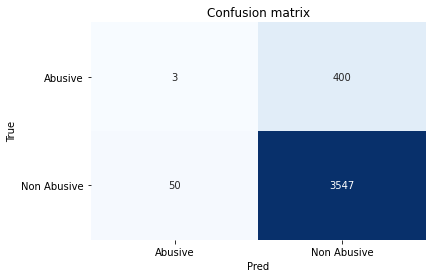

In [ ]:

cm6 = metrics.confusion_matrix(smp_y,smp_svm_pred)
fig, ax = plt.subplots()
sns.heatmap(cm6, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [ ]:
smp_pred_NB=NB_mb.predict(tf)

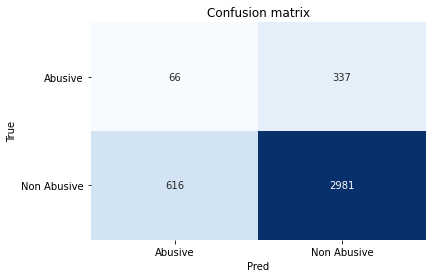

In [ ]:
cm7 = metrics.confusion_matrix(smp_y,smp_pred_NB)
fig, ax = plt.subplots()
sns.heatmap(cm7, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);